In [14]:
"""
This code will do linear regression on generated data
"""

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# generate data
np.random.seed(24)
x = np.random.rand(100)*10
x = np.round(x, 2)
rand_scaler = 1.5
y = 1 + ( 0.6 * x) + (np.random.rand(100) * rand_scaler)
df = pd.DataFrame({'X': x, 'Y': y})

In [ ]:
import os
import pandas as pd

# Directory containing the CSV files
data_folder = './data'

# List to hold DataFrames
dataframes = []

# Iterate over all files in the directory
for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_folder, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

def find_outlying_years(dataframes):
    """
    This function finds the outlying years that do not match across all dataframes.
    """

    df_sets = [set(dfi["Year"].unique()) for dfi in dataframes]

    years_to_remove = set()
    for i, current_set in enumerate(df_sets):
        for refSet in df_sets[i+1:]:
            years_to_remove.update(current_set.union(refSet) - current_set.intersection(refSet))
    return years_to_remove

# Find outlying years
years_to_remove = find_outlying_years(dataframes)

# next we remove the years from each DataFrame
for df in dataframes:
    df.drop(df[df["Year"].isin(years_to_remove)].index, inplace=True)

# check the resulting data frames for the years that dont match accross all data frames
setsRemoved = find_outlying_years(dataframes) == set() # should return True
print(f"Sets removed: {setsRemoved}")

Sets removed: True


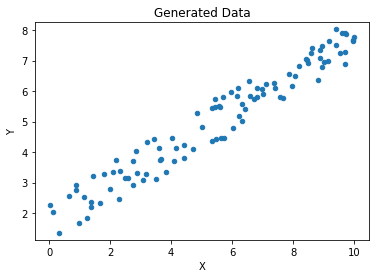

In [15]:
# This section is for plotting and visualizing the data
df.plot(kind='scatter', x='X', y='Y')
plt.title('Generated Data')
plt.axis('equal')
plt.show()

# Linear regression

In [ ]:
# this section will deal with the functionality of the linear regression

# Line function
def line(a, x, b):
    return (a * x) + b

# Cost function
def cost_function(a, x, b, y):
    m = len(x) # number of data points
    total_error = 0 # initialize total error
    for i in range(m):
        Yc = line(a, x[i], b) # Calculated y estimate
        total_error  += (y[i]-Yc)**2
    return total_error/(2*m)

def gradient_descent(
    a = 0,
    b = 0,
    data=pd.DataFrame([]),
    alpha = 1,
    num_iterations = 1000
):
    """
    This function will perform gradient descent to find the best fit line
    """

    # init the x and y values
    x = data['X']
    y = data['Y']

    # get the number of data points
    m = len(x)

    # perform gradient descent
    # -> This is the important bit
    for i in range(num_iterations):
        y_da = 0 # initialize slope gradient
        y_db = 0 # initialize constant gradient

        for j in range(m):
            Yc = line(a, x[j], b)
            y_da += -(1/m)*(y[j]-Yc)*x[j]
            y_db += -(1/m)*(y[j]-Yc)

        a -= alpha*y_da
        b -= alpha*y_db
        if i % 50 == 0:
            print(f'Iteration: {i} Cost: {cost_function(a, x, b, y)}')

    return (a, b)

# Testing and implementation phase

Iteration: 0 Cost: 122.00669826161091
Iteration: 50 Cost: 9.377761950462803e+48
Iteration: 100 Cost: 7.229491021946517e+95
Iteration: 150 Cost: 5.573349026398146e+142
Iteration: 200 Cost: 4.296598374042877e+189
Iteration: 250 Cost: 3.312327561110684e+236
Iteration: 300 Cost: 2.5535348936441952e+283
Iteration: 350 Cost: inf
Iteration: 400 Cost: inf
Iteration: 450 Cost: inf


/tmp/ipykernel_7606/2130352137.py:13: RuntimeWarning: overflow encountered in scalar power
  total_error  += (y[i]-Yc)**2


Iteration: 500 Cost: inf
Iteration: 550 Cost: inf
Iteration: 600 Cost: inf
Iteration: 650 Cost: inf
Iteration: 700 Cost: nan


/tmp/ipykernel_7606/2130352137.py:42: RuntimeWarning: overflow encountered in scalar add
  y_da += -(1/m)*(y[j]-Yc)*x[j]
/tmp/ipykernel_7606/2130352137.py:45: RuntimeWarning: invalid value encountered in scalar subtract
  a -= alpha*y_da


Iteration: 750 Cost: nan
Iteration: 800 Cost: nan
Iteration: 850 Cost: nan
Iteration: 900 Cost: nan
Iteration: 950 Cost: nan

Y = nan * X + nan


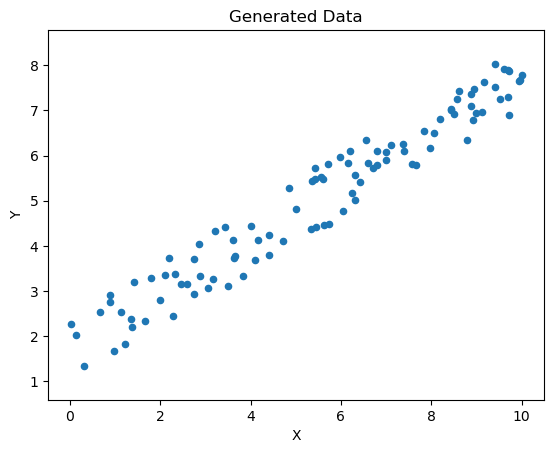

In [ ]:
# run the gradient descent and write out the results as a line equation
a, b = gradient_descent(data=df, alpha=0.01, num_iterations=1000)
print(f'\nY = {a} * X + {b}')

# plot the line with that data to see how well it fits
df.plot(kind='scatter', x='X', y='Y')
plt.plot(df['X'], line(a, df['X'], b), color='red')
plt.axis('equal')
plt.title('Generated Data')
plt.show()